In [80]:
%load_ext autoreload
%autoreload 2

import numpy as np
from tqdm.auto import tqdm

from modules.data_manage.load_mnist import load_mnist
from modules.grammar.count_accuracy import CountAccuracy
from modules.grammar.grammar import Grammar
from modules.grammar.merge.stupid_merge_same_nodes import stupid_merge_same_nodes
from modules.grammar.node import merge_nodes
from modules.plots.draw_imgs import draw_imgs
from modules.plots.plot_random_from_grammar import plot_random_from_grammar
from modules.utils import inject_jupyter_style

inject_jupyter_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
x_train, y_train, x_test, y_test = load_mnist(size=1000)
# draw_imgs(x_train, (2, 7), random=False)

Train: (1000, 32, 32) (1000,)
Test:  (1000, 32, 32) (1000,)


In [ ]:
grammar = Grammar(colors=x_train.max() + 1)
metric = CountAccuracy(
    grammar=grammar,
    train=x_train[y_train == 0],
    valid=x_test[y_test == 0],
    wrong_train=[x_train[y_train == i] for i in range(1, 10)],
    wrong_valid=[x_test[y_test == i] for i in range(1, 10)],
)
grammar.add_images(x_train[y_train == 0])

  0%|          | 0/97 [00:00<?, ?it/s]

In [92]:
[metric.wrong_train[i].shape for i in range(9)]

[(116,), (99,), (93,), (105,), (92,), (94,), (117,), (87,), (100,)]

In [83]:
stupid_merge_same_nodes(grammar)

  0%|          | 0/19780 [00:00<?, ?it/s]

  0%|          | 0/14439 [00:00<?, ?it/s]

  0%|          | 0/10058 [00:00<?, ?it/s]

  0%|          | 0/6758 [00:00<?, ?it/s]

  0%|          | 0/4585 [00:00<?, ?it/s]

  0%|          | 0/3830 [00:00<?, ?it/s]

  0%|          | 0/3694 [00:00<?, ?it/s]

  0%|          | 0/3645 [00:00<?, ?it/s]

  0%|          | 0/3638 [00:00<?, ?it/s]

(19780, 3638)

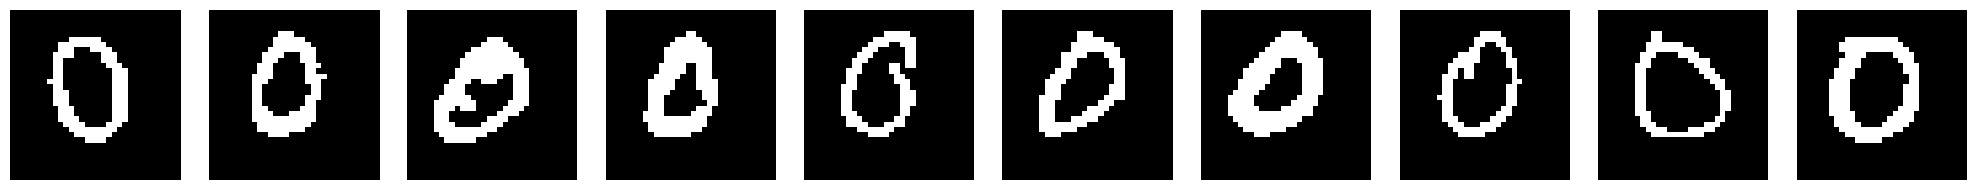

In [84]:
plot_random_from_grammar(grammar, (10,))

In [85]:
nodes = grammar.set_height_for_all_nodes()

height           0   1   2    3    4    5    6    7    8    9   10  11
number of nodes   2   4  30  182  431  902  839  589  369  194  97   1


In [88]:
metric.count_metrics()

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(

IndexError: tuple index out of range